In [67]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import scipy.stats as stats
from scipy.stats import t

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2016




***We want to answer the question: Do customers take the bicycles for longer rides than subscribers on average? ***

Null Hypothesis: the average trip duration of 'customers' is the same or shorter than the average trip duration of 'subscribers' with a significance level of alpha = 0.05

Alternative Hypothesis: The average trip duration of 'customers' is greater than the average trip duration of 'subscribers' with a significance level of alpha = 0.05


In [21]:
datestring = '201701'

In [22]:
df = pd.read_csv('https://s3.amazonaws.com/tripdata/' + datestring + '-citibike-tripdata.csv.zip', compression='zip')

In [23]:
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


In [24]:
df.columns

Index([u'Trip Duration', u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726676 entries, 0 to 726675
Data columns (total 15 columns):
Trip Duration              726676 non-null int64
Start Time                 726676 non-null object
Stop Time                  726676 non-null object
Start Station ID           726676 non-null int64
Start Station Name         726676 non-null object
Start Station Latitude     726676 non-null float64
Start Station Longitude    726676 non-null float64
End Station ID             726676 non-null int64
End Station Name           726676 non-null object
End Station Latitude       726676 non-null float64
End Station Longitude      726676 non-null float64
Bike ID                    726676 non-null int64
User Type                  723483 non-null object
Birth Year                 697600 non-null float64
Gender                     726676 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 83.2+ MB


In [26]:
df2 = df.drop([u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'Birth Year', u'Gender'], axis=1)

In [27]:
# df2 is a dataframe with only the necessary columns - trip duration and user type
df2.head()

,Trip Duration,User Type
0,680,Subscriber
1,1282,Subscriber
2,648,Customer
3,631,Customer
4,621,Customer


In [28]:
# df3 is a cleaned version of df2
df3 = df2.dropna(how = 'any')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723483 entries, 0 to 726675
Data columns (total 2 columns):
Trip Duration    723483 non-null int64
User Type        723483 non-null object
dtypes: int64(1), object(1)
memory usage: 16.6+ MB


In [29]:
df3['User Type'] = df3['User Type'].astype('category')

/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723483 entries, 0 to 726675
Data columns (total 2 columns):
Trip Duration    723483 non-null int64
User Type        723483 non-null category
dtypes: category(1), int64(1)
memory usage: 11.7 MB


In [31]:
index_of_subscribers = [i for i,j in enumerate(df3['User Type']) if j == 'Subscriber']
subscriber_trip_durations = df3['Trip Duration'][index_of_subscribers]
index_of_customers = [i for i,j in enumerate(df3['User Type']) if j == 'Customer']
customer_trip_durations = df3['Trip Duration'][index_of_customers]
means = [np.mean(subscriber_trip_durations), np.mean(customer_trip_durations)]

names = ['Subscriber', 'Customer']

types = [1, 2]

# df4 is just a dataframe with the means of the subscribers and customers
df4 = pd.DataFrame(means,names)
df4.columns = ['means']

df4

,means
Subscriber,769.908443
Customer,960.451832


Text(0,0.5,u'Duration (Seconds)')

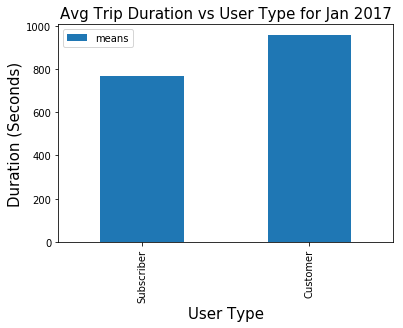

In [108]:
df4.plot.bar()

plt.title('Avg Trip Duration vs User Type for Jan 2017', fontsize = 15)
plt.xlabel('User Type', fontsize = 15)
plt.ylabel('Duration (Seconds)', fontsize = 15)

1. we want to compare the averages of subsribers and customers. 
2. Trip duration is a continuous variable
3. User type is a categorical variable
4. The two groups are unpaired

To test H0 given the type of data and the question asked, we prefer to choose t test or Z test.

The reason is that the hypothesis needs to be tested based on comparision between the means of two groups, and the t test and Z test could be used to test that is there a difference between means of 2 samples that is approximately normally distributed.

Comparision between t test and Z test:

We have no standard deviation valuation of the population, so the resulting test will not be an exact Z-test since the uncertainty in the sample variance is not accounted for, which makes t test seems better than Z test. However, it will still be a good approximation for Z test because the sample size is large enough —— the dataset of Srikanth has 726676 observations.

According to the article How to choose the right statistical test? (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3116565/) This question raised is applicaple to the Question 1, is there a difference between groups that are unpaired, and t test is suitable for numerical data of two unpaired groups.

The groups are unpaired so we need to choose the unpaired t-test. 
Also we need to do a one sided t test because our H0 is Mean(Customer) <= Mean(Subscribers)

In [155]:
n_subs = len(subscriber_trip_durations)

n_cust = len(customer_trip_durations)

print('the number of Customers is :', n_cust)

print('\n the number of Subscribers is : ', n_subs)

the number of Customers is : 22847

 the number of Subscribers is :  697448


In [156]:
std_subs = np.std(subscriber_trip_durations)

std_cust = np.std(customer_trip_durations)

print('the standard deviation of the trip durations of the Customers is :', std_cust)

print('the standard deviation of the trip durations of the Subscribers is :', std_subs)

the standard deviation of the trip durations of the Customers is : 21155.5419662
the standard deviation of the trip durations of the Subscribers is : 10820.1236259


*** The variances are different ***

In [157]:
t_stat, p_val_two_sided = stats.ttest_ind(customer_trip_durations, subscriber_trip_durations, axis = 0,
                                equal_var= False, nan_policy= 'omit')

In [158]:
print('The t statistic is : ', t_stat)

The t statistic is :  1.35557038035


In [159]:
print('the two sided P-value is : ', p_val_two_sided)

the two sided P-value is :  0.175249074818


In [160]:
p_val_one_sided = p_val_two_sided / 2

In [161]:
print('the p-value for a one-tailed t test is :', p_val_one_sided)

the p-value for a one-tailed t test is : 0.0876245374091


*** The P-value is not less than 0.025 which is the significance level for a one tailed t-test. So we cannot reject the null hypothesis ***